# PUNTO 3 - ALEJANDRA RUIZ

## LECTURA DEL ARCHIVO WINE QUALITY

In [2]:
import pandas as pd

wine = pd.read_excel(r"D:\MAESTRIA CIENCIA DE DATOS\Analisis Cuantitativo\datasets\datos.xls", 
                     sheet_name="Wine Quality",
                     header=2)
wine

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,5,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,7,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


### ELIMINAR COLUMNAS

In [3]:
wine.drop(columns=['pH','Sulfatos','Acidez Volátil','Acidez Fija','Calidad del Vino'],
          inplace=True)

### VERIFICO QUE TODAS LAS VARIABLES TENGAN EL TIPO DE DATO CORRECTO Y QUE NO HAYAN NULOS

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ácido Cítrico            4898 non-null   float64
 1   Azúcar Residual          4898 non-null   float64
 2   Cloruros                 4898 non-null   float64
 3   Dióxido de Azúfre Libre  4898 non-null   float64
 4   Dióxido de Azúfre Total  4898 non-null   float64
 5   Densidad                 4898 non-null   float64
 6   Alcohol                  4898 non-null   float64
dtypes: float64(7)
memory usage: 268.0 KB


## ESTANDARIZAR

### HACEMOS USO DE LA LIBRERÍA SKLEARN 

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# Inicializando el escalador
scaler = StandardScaler()

# Ajustando y transformando los datos
standard_wine = pd.DataFrame(scaler.fit_transform(wine), columns=wine.columns)

In [7]:
standard_wine

,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.393152
1,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,-0.824276
2,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,-0.336667
3,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,-0.499203
4,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,-0.499203
...,...,...,...,...,...,...,...
4893,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.557282
4894,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.743008
4895,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-0.905544
4896,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.857572


## CÁLCULO DE LAS CORRELACIONES

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

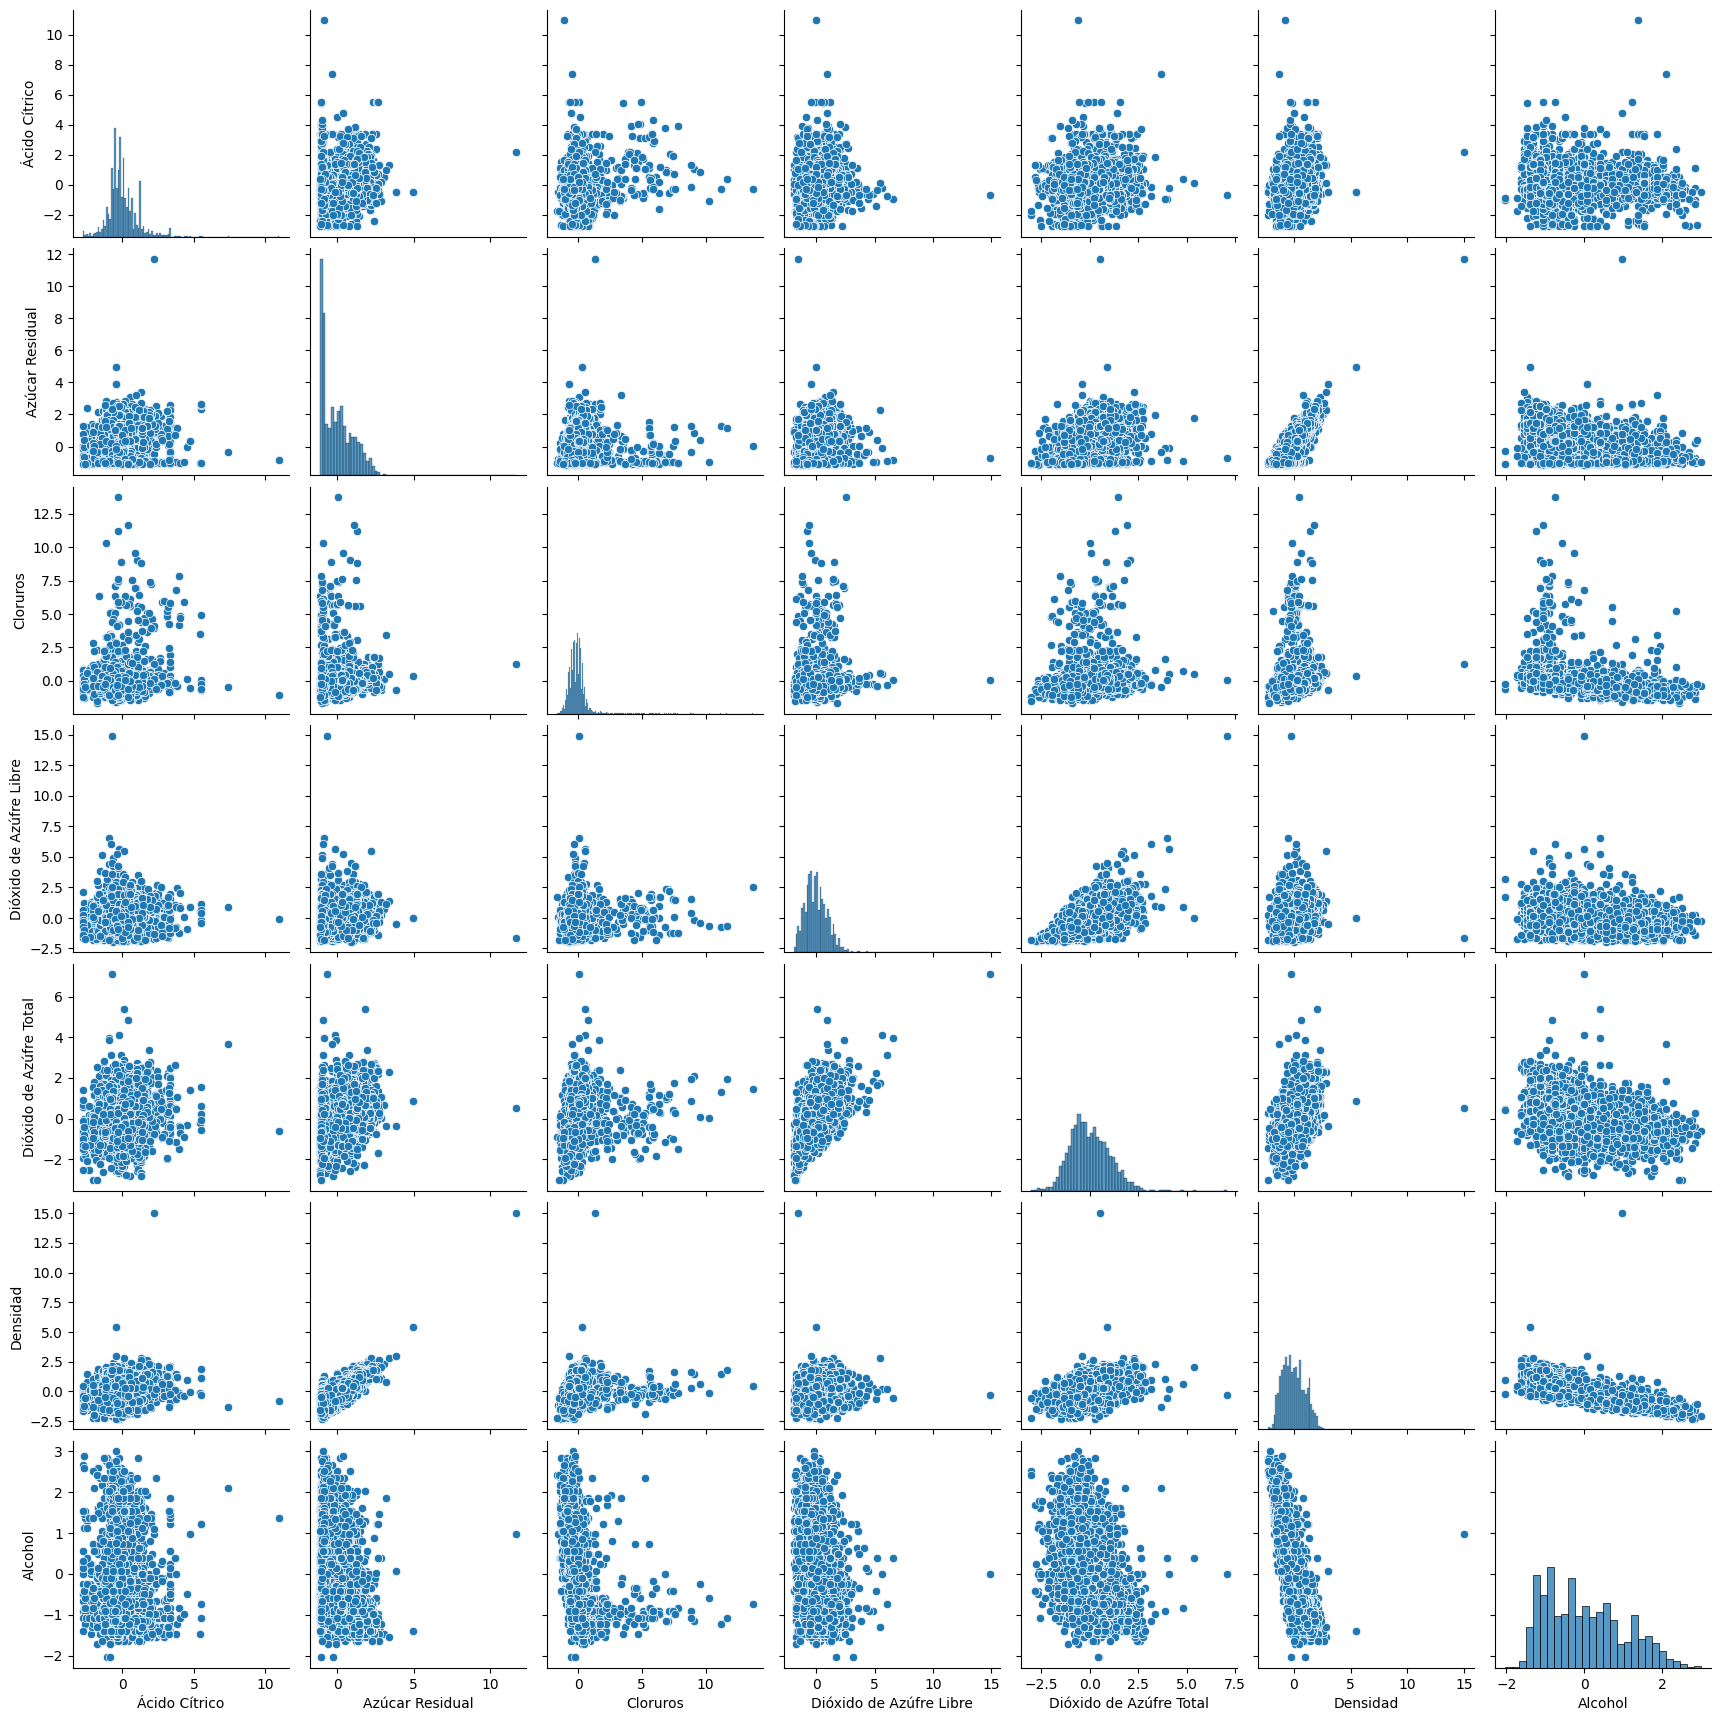

In [9]:
sns.pairplot(standard_wine)
plt.show()

### PEARSON

In [10]:
corr_pearson = standard_wine.corr(method='pearson').reset_index(drop=True)

In [11]:
sns.set(font_scale=1.0)

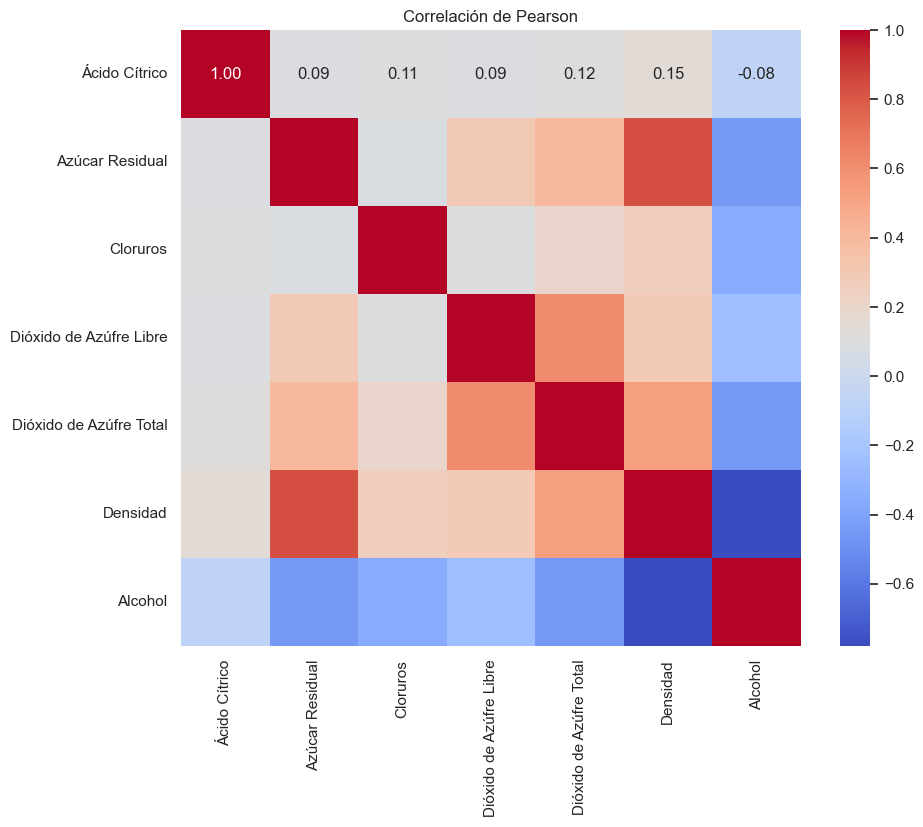

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=standard_wine.columns, yticklabels=standard_wine.columns)
plt.title("Correlación de Pearson")
plt.show()

##### La mayor correlación contra la variable Y (Densidad) Es con  Alcohol de manera negativa (-0.78), Ázucar Residual de manera positiva (0.84), y una correlación media (0.53) con Dióxido de Azúfre Total

In [13]:
corr_pearson

,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.075729
1,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.450631
2,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.360189
3,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.250104
4,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,-0.448892
5,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.780138
6,-0.075729,-0.450631,-0.360189,-0.250104,-0.448892,-0.780138,1.000000


### KENDALL

In [14]:
corr_kendall = standard_wine.corr(method='kendall').reset_index(drop=True)

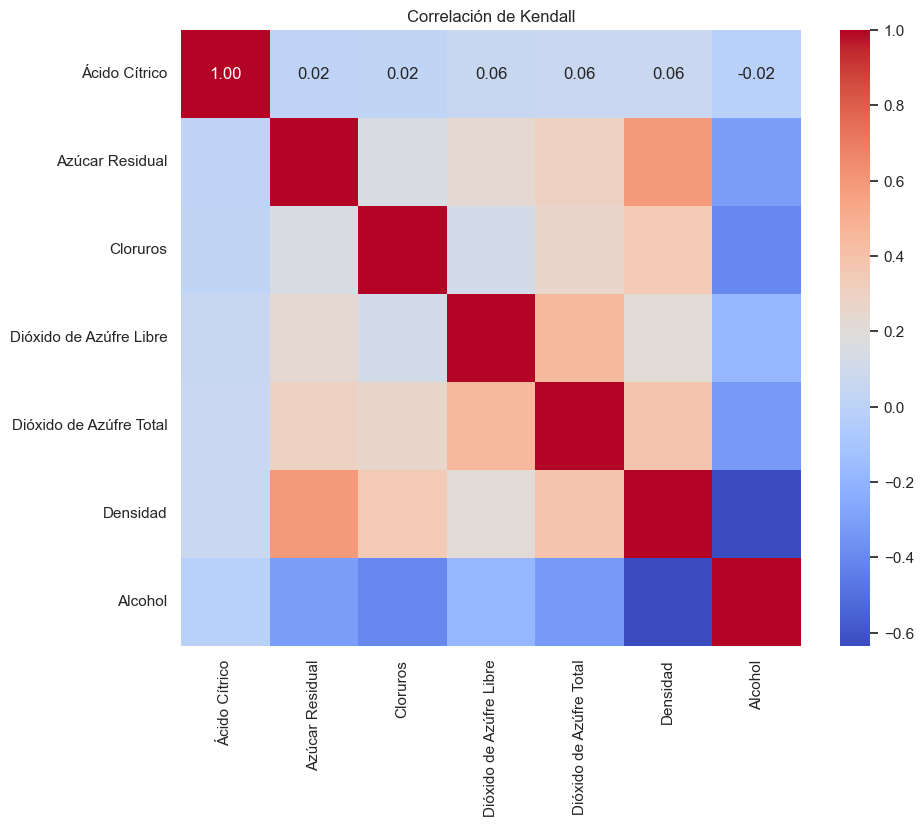

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_kendall, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=standard_wine.columns, yticklabels=standard_wine.columns)
plt.title("Correlación de Kendall")
plt.show()

##### Comparando frente a Pearson, la correlación fuerte que tenía Densidad y Ázucar Residual disminuyó (0.59) significativamente, y con Alcohol también bajó pero no tanto (-0.64). Incrementó de forma negativa un poco la correlación de Ácido Cítrico frente a todas las variables.

##### Recordemos que Kendall Penaliza, por esta razón es menor, adicionalmente Pearson es muy buneo cuando sí hay comportamientos lineales, y al observar las gráficas de disperción, claramente se ve un comportamiento elíptico entre Densidad y Alcohol, por eso Kendall no bajó tanto esta correlación, pero la de Ázucar Residual tenía unos puntos atípicos alejados de la concentración, pero que conservaban linealidad, y por eso es que Kendall sí bajó significativamente esta correlación, dado que Pearson sí se afecta bastante con los atípicos, Kendall NO.

In [16]:
corr_kendall

,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,1.000000,0.015329,0.022292,0.060809,0.062188,0.061542,-0.019981
1,0.015329,1.000000,0.155274,0.236748,0.293319,0.588989,-0.305601
2,0.022292,0.155274,1.000000,0.113851,0.257075,0.349119,-0.404039
3,0.060809,0.236748,0.113851,1.000000,0.444696,0.217295,-0.182539
4,0.062188,0.293319,0.257075,0.444696,1.000000,0.388378,-0.325826
5,0.061542,0.588989,0.349119,0.217295,0.388378,1.000000,-0.635104
6,-0.019981,-0.305601,-0.404039,-0.182539,-0.325826,-0.635104,1.000000


### SPEARMAN

In [17]:
corr_spearman = standard_wine.corr(method='spearman').reset_index(drop=True)

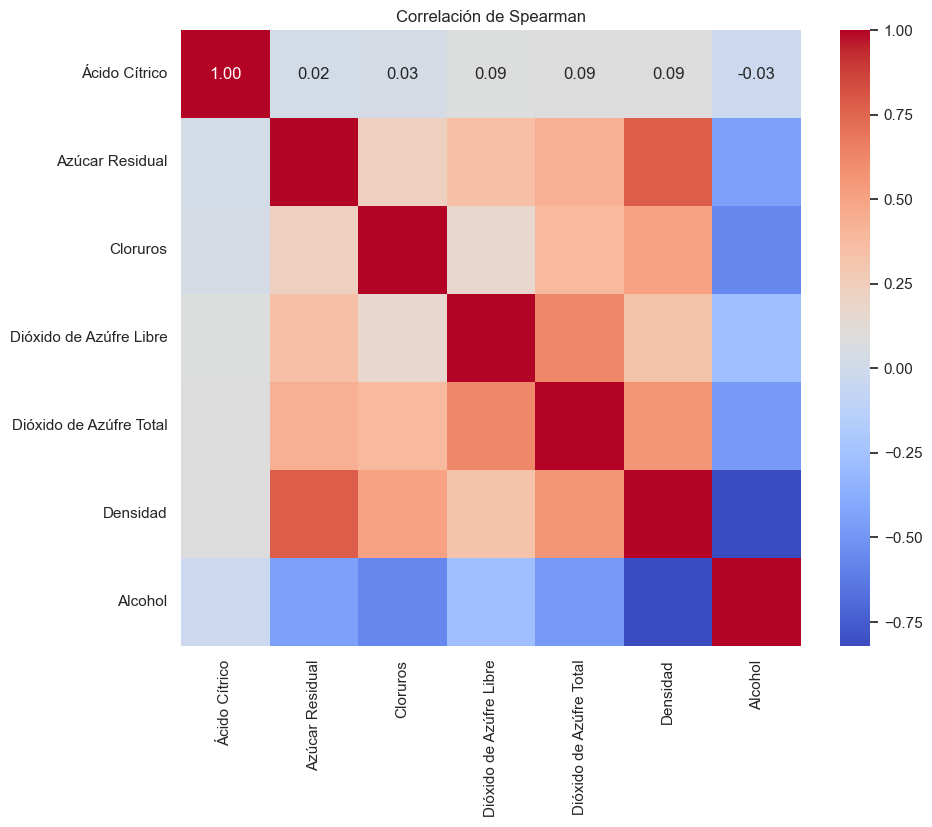

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=standard_wine.columns, yticklabels=standard_wine.columns)
plt.title("Correlación de Spearman")
plt.show()

In [19]:
corr_spearman

,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,1.000000,0.024621,0.032659,0.088314,0.093219,0.091425,-0.029170
1,0.024621,1.000000,0.227844,0.346107,0.431252,0.780365,-0.445257
2,0.032659,0.227844,1.000000,0.167046,0.375244,0.508302,-0.570806
3,0.088314,0.346107,0.167046,1.000000,0.618616,0.327822,-0.272569
4,0.093219,0.431252,0.375244,0.618616,1.000000,0.563824,-0.476619
5,0.091425,0.780365,0.508302,0.327822,0.563824,1.000000,-0.821855
6,-0.029170,-0.445257,-0.570806,-0.272569,-0.476619,-0.821855,1.000000


##### Con Spearman frente a Pearson, bajó pero muy poco la correlación entre Densidad y Ázucar Residual, pero incrementó la correlación frente a las demás variables incluída Alcohol, exceptuando Ácido Cítrico. Recordemos que Pearson es más sencible a los Outliers, y como podemos observar en el diagrama de dispersión, el de Ázucar vs Densidad, hay varios outliars, que aunque están alineados con los demás, esto puede estar generando un incremento en la correlación vs el de Spearman.

## MODELADO

### PARTICIÓN DEL DATASET

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = standard_wine['Densidad']
X = standard_wine.drop(columns='Densidad')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Recordemos que la Matriz más invertible es la Matriz Identidad, la cuál sería que no hubiera ninguna correlación entre variables, (tener correlaciones cercanas a 0), La Calidad de una Matriz se evalúa a partir de su Capacidad de Invertibilidad, y como analizamos, la mayoría de correlaciones entre las X está más cercanas a 0, por lo que validamos este supuesto para obtener buenos valores de ˆβ

### Calcular ˆβ(⋅) y ˆβ0(·) ESTIMADORES MÍNIMOS CUADRADOS con Pearson, Generar y Evaluar el Modelo

#### Separar la Matriz de Correlación, dejar sólo entre las Variables X y dejar la de la Variable Y con X (Como Densidad es la Penúltima Columna, significa que la penúltima fila también representa la correlación de la X con Y -Densidad-)

In [23]:
p_xy = corr_pearson['Densidad']
p_xx = corr_pearson.drop(columns='Densidad')
indice_penultima_fila = p_xx.index[-2]  # Obtener el índice de la penúltima fila
p_xx = p_xx.drop(index=indice_penultima_fila)
p_xy = p_xy.drop(index=p_xy.index[-2])

In [24]:
p_xy

0    0.149503
1    0.838966
2    0.257211
3    0.294210
4    0.529881
6   -0.780138
Name: Densidad, dtype: float64

#### Invertir la Matriz de Correlación entre las Variables X

In [25]:
import numpy as np

In [26]:
inv_pxx = np.linalg.inv(p_xx)

#### MULTIPLIACIÓN DE MATRICES PARA CALCULAR BETA

In [27]:
beta = np.dot(inv_pxx, p_xy)

In [28]:
beta

array([ 0.04912064,  0.5980971 ,  0.01421093, -0.08283074,  0.12203417,
       -0.46771405])

#### OBTENER LA MEDIA DE X y Y (ˆμY ˆμX)

In [29]:
mu_Y = y_train.mean()
mu_X = X_train.mean()

#### CALCULAR BETA0

In [30]:
beta_0 = mu_Y - np.dot(mu_X, beta)

#### Recordemos que Beta nos dice cuánto se espera que cambie Y con un cambio unitario en las variables X, pero como hicimos una estandarización, debe tenerse en cuenta que este cambio representa en el valor estandarizado y no en el valor real. 

#### MODELO

In [31]:
y_pred_test = np.dot(X_test, beta) + beta_0

In [32]:
y_pred_test

array([-4.48681074e-01,  4.70796910e-01, -5.76152127e-01, -9.57462920e-01,
        8.27468996e-01,  5.74656484e-01, -7.21273130e-01, -8.64718189e-01,
       -8.58474351e-01,  1.12970887e+00,  5.76218024e-01,  1.49882313e+00,
       -6.72752109e-02,  8.40139093e-01, -1.20062581e+00,  1.74791180e-01,
       -9.48106367e-01, -2.77098525e-01, -1.52960108e+00, -9.28489859e-01,
       -3.49483675e-01, -6.51397067e-01,  2.72396093e-01,  2.17620979e-01,
       -2.93183313e-01, -4.75892543e-01,  4.46788601e-01,  9.11166788e-01,
       -1.22271151e+00, -3.28653646e-01,  1.38584383e+00, -4.82501047e-01,
       -7.95613578e-01, -1.28487625e+00,  9.72758966e-01, -5.08201020e-01,
       -3.78916387e-01,  1.63828228e+00, -1.16456947e+00, -4.20114858e-01,
       -9.67897057e-03, -3.84147181e-01, -1.98561244e-01,  1.38541343e+00,
        1.40847179e+00, -1.03685699e+00,  1.12717922e+00, -1.12467256e+00,
       -1.31749298e+00,  4.82841331e-02, -6.66647571e-01, -8.36455259e-01,
       -3.49036975e-01,  

#### CALCULAR ERROR CUADRÁTICO MEDIO (MSE), LA RAIZ DEL ERROR (RMSE) Y EL COEFICIENTE DE DETERMINACIÓN (R²)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

In [35]:
mse

0.13755303612153544

In [36]:
rmse

0.370881431351767

In [37]:
r2

0.8810170491518581

### REPETIR EL PROCESO PARA KENDALL

In [38]:
p_xy = corr_kendall['Densidad']
p_xx = corr_kendall.drop(columns='Densidad')
indice_penultima_fila = p_xx.index[-2]  # Obtener el índice de la penúltima fila
p_xx = p_xx.drop(index=indice_penultima_fila)
p_xy = p_xy.drop(index=p_xy.index[-2])

In [39]:
inv_pxx = np.linalg.inv(p_xx)

In [40]:
beta_kendall = np.dot(inv_pxx, p_xy)
beta_kendall

array([ 0.03908945,  0.41339588,  0.07885295, -0.02163421,  0.10921176,
       -0.4444938 ])

In [41]:
beta_0 = mu_Y - np.dot(mu_X, beta_kendall)

In [42]:
y_pred_test_kendall = np.dot(X_test, beta_kendall) + beta_0

In [43]:
mse = mean_squared_error(y_test, y_pred_test_kendall)
print(f"mse: {mse}")
rmse = np.sqrt(mse)
print(f"rmse: {rmse}")
r2 = r2_score(y_test, y_pred_test_kendall)
print(f"r2: {r2}")

mse: 0.20428729823767142
rmse: 0.45198152422158966
r2: 0.8232921188040059


### REPETIR EL PROCESO PARA SPEARMAN

In [44]:
p_xy = corr_spearman['Densidad']
p_xx = corr_spearman.drop(columns='Densidad')
indice_penultima_fila = p_xx.index[-2]  # Obtener el índice de la penúltima fila
p_xx = p_xx.drop(index=indice_penultima_fila)
p_xy = p_xy.drop(index=p_xy.index[-2])

In [45]:
inv_pxx = np.linalg.inv(p_xx)

In [46]:
beta_spearman = np.dot(inv_pxx, p_xy)
beta_spearman

array([ 0.057818  ,  0.50869835,  0.06059505, -0.07683468,  0.11309123,
       -0.52612008])

In [47]:
beta_0 = mu_Y - np.dot(mu_X, beta_spearman)

In [48]:
y_pred_test_spearman = np.dot(X_test, beta_spearman) + beta_0

In [49]:
mse = mean_squared_error(y_test, y_pred_test_spearman)
print(f"mse: {mse}")
rmse = np.sqrt(mse)
print(f"rmse: {rmse}")
r2 = r2_score(y_test, y_pred_test_spearman)
print(f"r2: {r2}")

mse: 0.1598208640101793
rmse: 0.39977601730241313
r2: 0.8617554468937412


##### COMPARANDO LOS BETAS (COEFICIENTES DE REGRESIÓN), SE MANTIENE LA DIRECCIÓN Y EN CONCLUSIÓN LAS VARIABLES QUE TIENEN UNA FUERTE CORRELACIÓN (ÁZUCAR RESIDUAL Y ALCOHOL) SE MANTIENEN. RECORDEMOS QUE EL COMPORTAMIENTO NO SE PUEDE ANALIZAR DIRECTAMENTE EN LAS VARIABLES, PORQUE FUERON ESTANDARIZADAS INICIALMENTE.

### AHORA ANALICEMOS LAS MEDIDAS DEL RESULTADO DE LOS MODELOS
### El MSE: Mide el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores predichos y los valores reales. Por tanto buscamos que el MSE sea bajo, indicando que el modelo tiene menor error en sus predicciones.

### el RMSE es la Raíz Cuadrada del MSE, busca estar en la escala original de los datos, también se desea que sea bajo, puede ajustar mejor el valor, porque penaliza si hay errores muy grandes.

#### El menor MSE como el RMSE fue el de Pearson, seguido del de Spearman por una diferencia muy pequeña.

### R2 (Coeficiente de determinación): Es una medida de la proporción de la varianza en la variable dependiente (Y). Un R2 más alto indica que el modelo explica una mayor proporción de la variabilidad en los datos de respuesta, finalemnte se busca tener un R2 grande.

#### De igual manera, el de Pearson dio un R2 mayor.

### Con esto se puede concluir que sí hay un buen comportamiento lineal entre los datos X vs Y, ya que Pearson es muy bueno para anlizar comportamientos lineales.

## PRUEBA DE HIPÓTESIS

### ANALIZAR LOS RESIDUOS DEL MODELO CON PEARSON

In [50]:
residuos = y_test - y_pred_test

In [51]:
residuos

2762   -0.082107
42     -0.011818
1419   -0.235516
3664   -0.469466
2125   -0.268176
          ...   
2111    0.193262
1828    0.323108
1256    0.141493
3335   -0.011934
230     0.096304
Name: Densidad, Length: 980, dtype: float64

#### INDEPENDENCIA (PRUEBA DE DURBIN WATSON)

In [52]:
pip install statsmodels --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\aleja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

In [54]:
dw = durbin_watson(residuos)

In [55]:
dw

1.9122533543275961

##### Valores del estadístico Durbin-Watson cercanos a 2 sugieren que no hay autocorrelación, valores significativamente menores que 2 indican autocorrelación positiva, y valores significativamente mayores que 2 indican autocorrelación negativa. Buscamos que NO haya autocorrelación

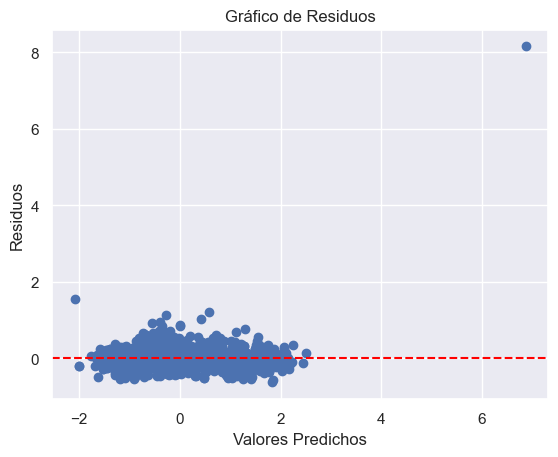

In [56]:
# Graficar los residuos
plt.scatter(y_pred_test, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.show()

#### NORMALIDAD (SHAPIRO WILKS)

In [57]:
shapiro_test = stats.shapiro(residuos)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

Shapiro-Wilk test statistic: 0.5886951684951782, p-value: 4.540207024412407e-43


##### AL SER UN P-VALUE TAN PEQUEÑO (Menor a 0.05) RECHAZAMOS LA HIÓTESIS, POR TANTO DECIMOS QUE NO HAY NORMALIDAD

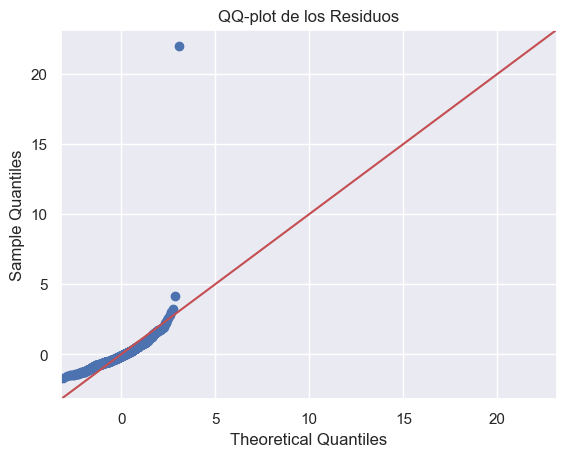

In [58]:
import statsmodels.api as sm
sm.qqplot(residuos, line ='45', fit=True)
plt.title('QQ-plot de los Residuos')
plt.show()

##### DESPUÉS DE VER EL GRÁFICO, EFECTIVAMENTE LOS PUNTOS NO ESTÁN TAN ENCIMA DE LA RECTA TEÓRICA

#### MEDIA CERO (Valor Esperado de Ei = 0 -One Sample t-test)

In [59]:
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(residuos, 0)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 1.0024556826995998
P-value: 0.31637126431723644


##### ESTA VEZ EL P-VALUE ES MAYOR A 0.05 POR TANTO NO SE RECHAZA LA HIPÓTESIS

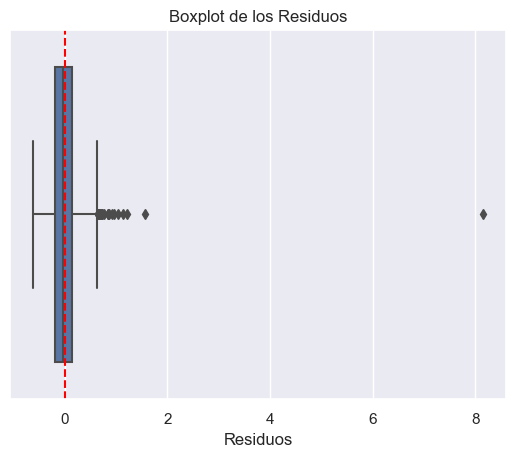

In [60]:
sns.boxplot(x=residuos)
plt.title('Boxplot de los Residuos')
plt.xlabel('Residuos')
plt.axvline(x=0, color='red', linestyle='--')  # Línea en x=0 para referencia
plt.show()

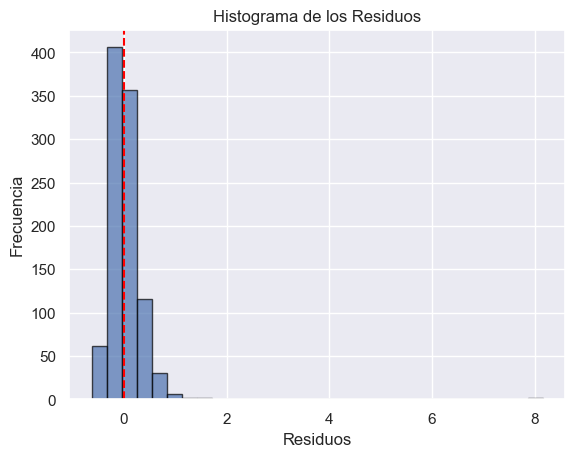

In [61]:
plt.hist(residuos, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.axvline(x=0, color='red', linestyle='--')  # Línea vertical para la media en x=0
plt.show()

#### HOMOCEDASTICIDAD (Varianza Constante)

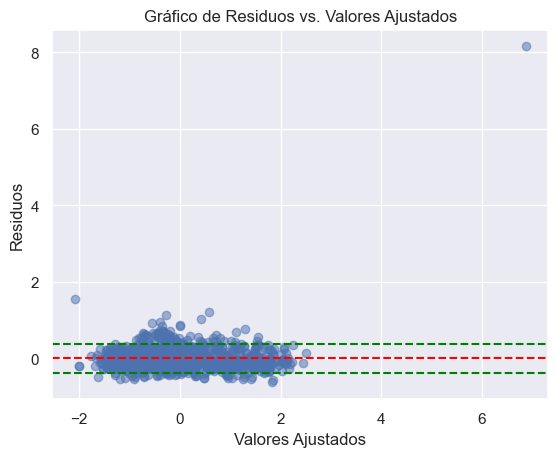

In [62]:
# Calcular la desviación estándar de los residuos
std_residuos = np.std(residuos)

# Crear el gráfico de dispersión de residuos
plt.scatter(y_pred_test, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Línea en y=0
plt.axhline(std_residuos, color='green', linestyle='--')  # Línea superior
plt.axhline(-std_residuos, color='green', linestyle='--')  # Línea inferior
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

##### EL GRÁFICO NOS MUESTRA QUE EFECTIVAMENTE NO HAY GRAN DISPERCIÓN DE LOS DATOS, POR TANTO TIENEN UNA VARIANZA CONSTANTE

## HACERLE TRANSFORMACIÓN A LAS VARIABLES PARA AJUSTAR LA GRÁFICA LINEAL

### Debido a la forma que presentaba la variable Cloruros frente a Densidad, podemos inferir que tiene un comportamiento Logarítmico

C:\Users\aleja\AppData\Local\Temp\ipykernel_29848\2143002310.py:2: RuntimeWarning: invalid value encountered in log10
  y_log = np.log10(x_log)


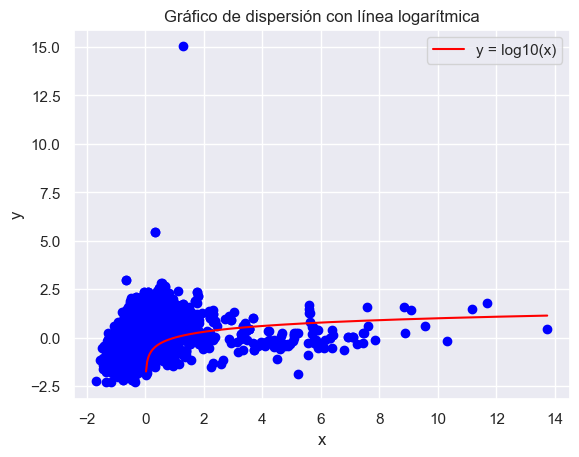

In [63]:
x_log = np.linspace(min(standard_wine['Cloruros']), max(standard_wine['Cloruros']), 400)
y_log = np.log10(x_log)

# Añadir la línea logarítmica al gráfico
plt.plot(x_log, y_log, color='red', label='y = log10(x)')
plt.scatter(standard_wine['Cloruros'], standard_wine['Densidad'], color='blue')
# Añadir etiquetas y leyenda
plt.title('Gráfico de dispersión con línea logarítmica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Hacerle la transformación a los valores originales

In [118]:
wine['log_Cloruros'] = np.log(wine['Cloruros'])

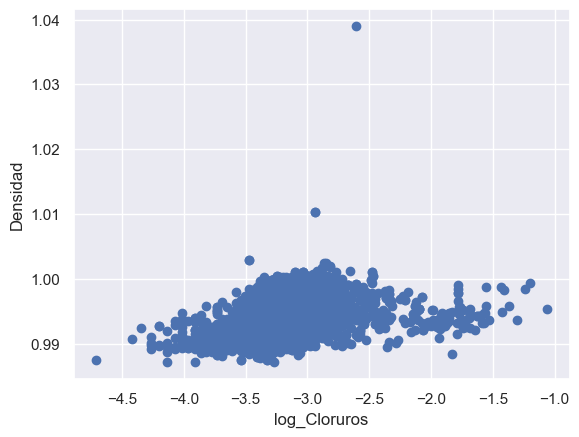

In [167]:
plt.scatter(wine['log_Cloruros'],wine['Densidad'])
plt.ylabel('Densidad')
plt.xlabel('log_Cloruros')
plt.show()

#### Ahora se aplica raíz cuadrada al Dióxido de Azúfre Libre, para lograr una forma más elíptica, ya que estaba más cercano a una círculo. La transformación de raíz cuadrada comprime la variabilidad en los datos, especialmente en los valores más altos.

In [158]:
wine['quad_azufre'] = np.sqrt(wine['Dióxido de Azúfre Libre'])

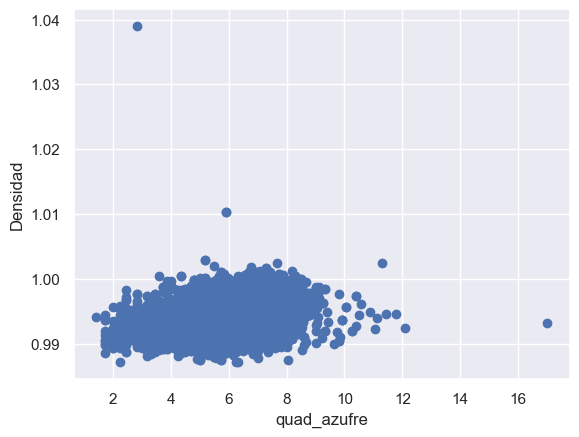

In [159]:
plt.scatter(wine['quad_azufre'],wine['Densidad'])
plt.ylabel('Densidad')
plt.xlabel('quad_azufre')
plt.show()

#### Normalizar Datos, Se hará igualmente con la librería de Sklearn, pero con otro método de Min y Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Supongamos que wine es tu DataFrame
scaler = MinMaxScaler()

# Ajustar y transformar los datos
wine_normalized = pd.DataFrame(scaler.fit_transform(wine), columns=wine.columns, index=wine.index)

#### Eliminemos la columna original de Cloruros y de Dióxido de Azufre

In [172]:
wine_normalized.drop(columns=['Cloruros',
                              'Dióxido de Azúfre Libre'], inplace=True)

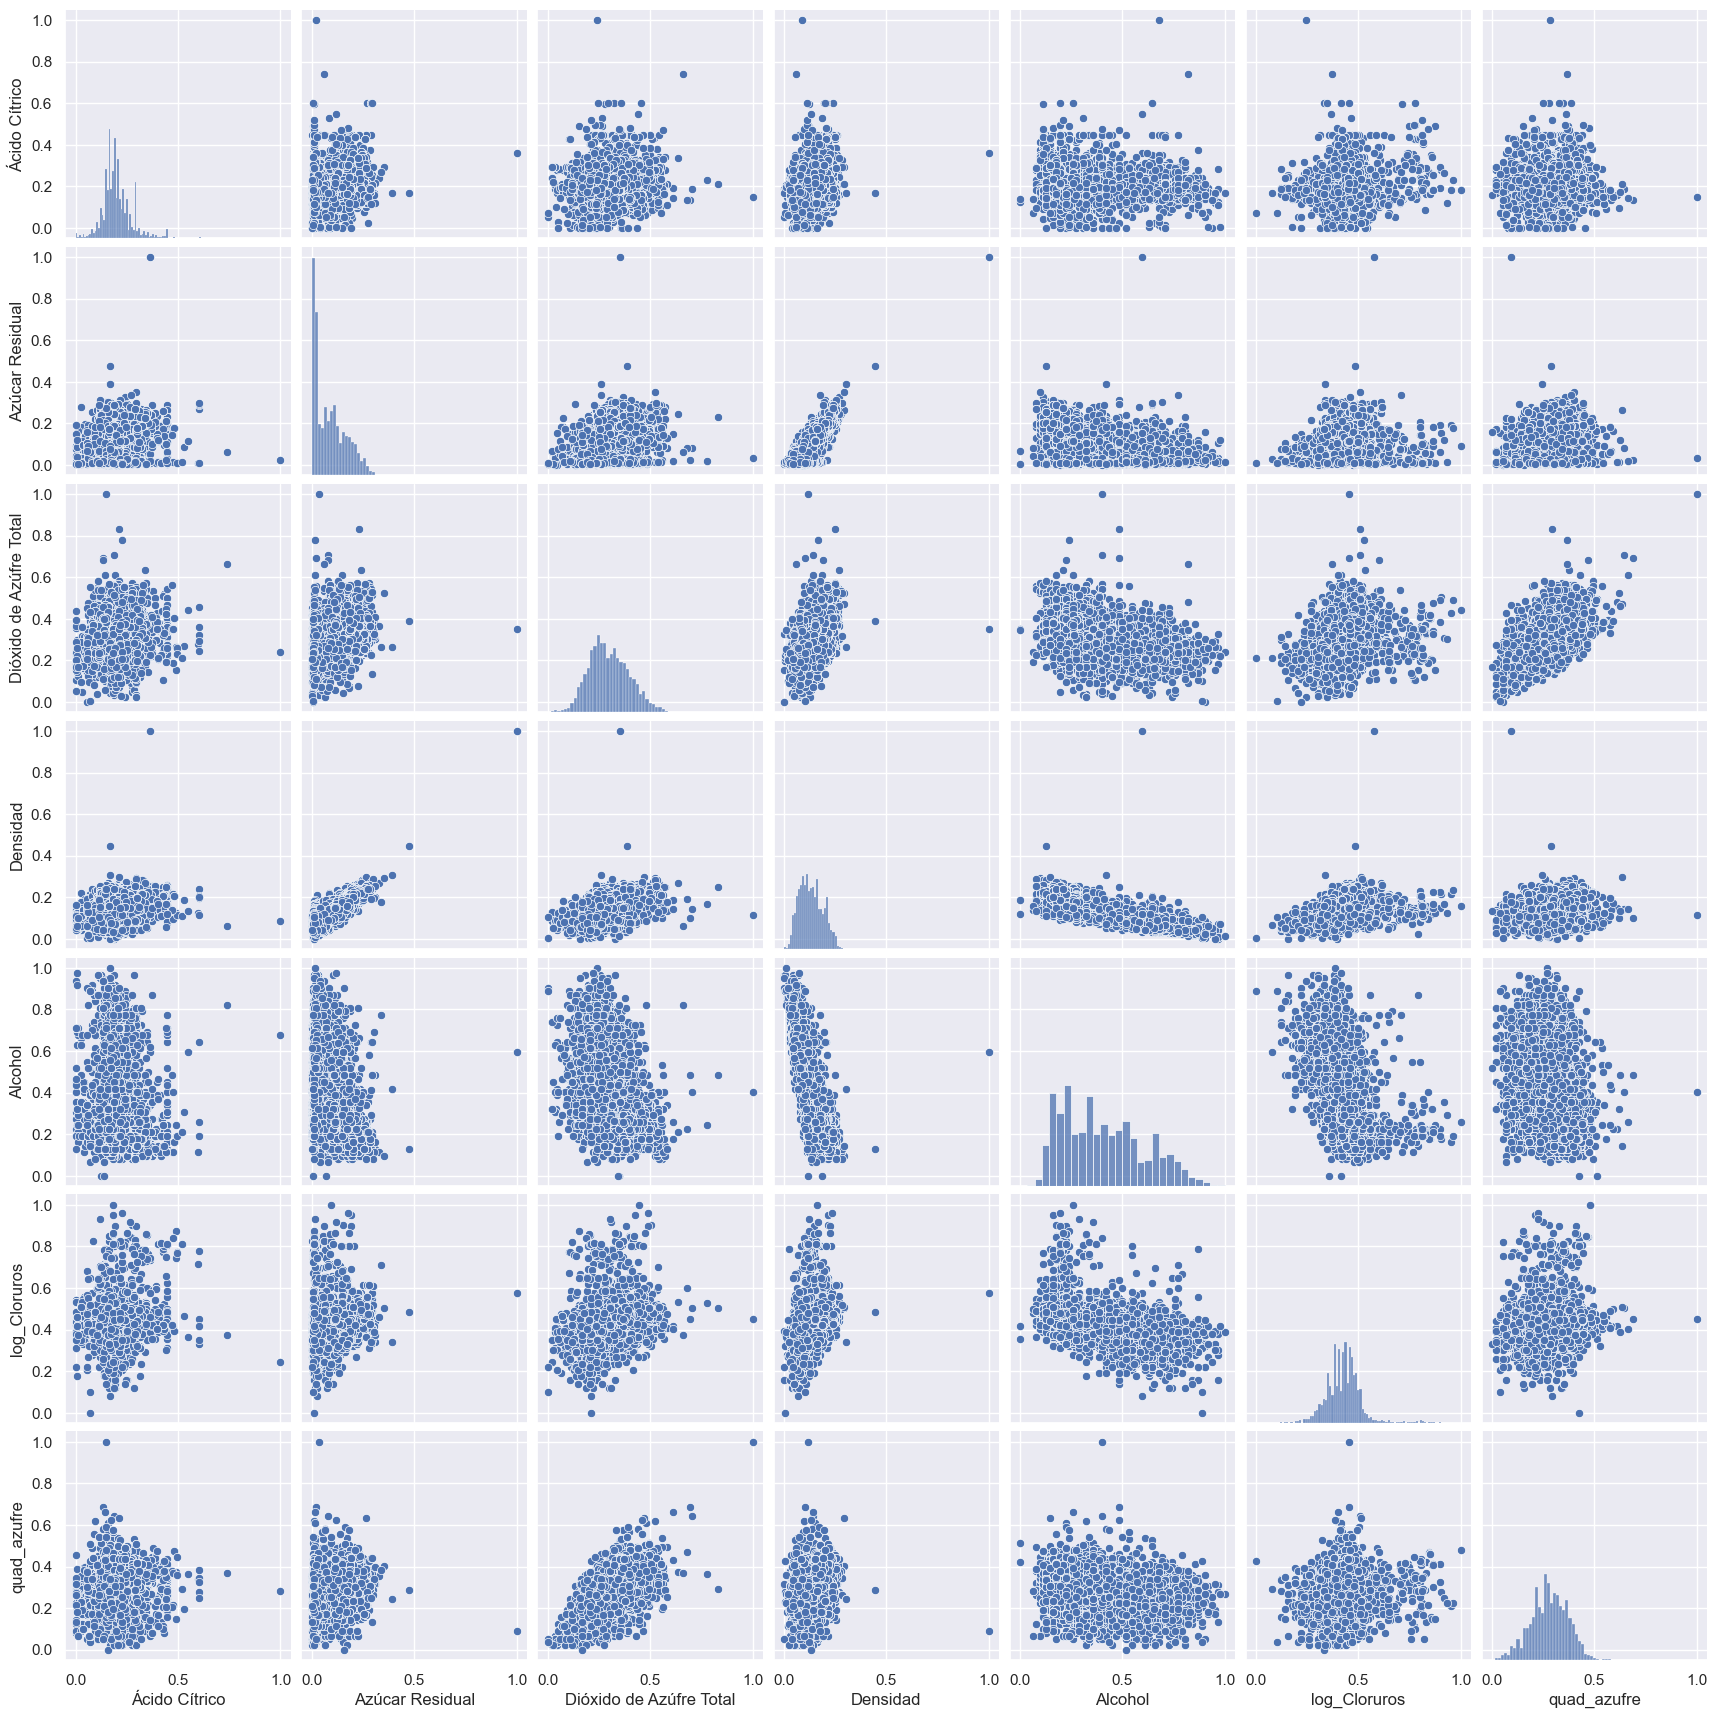

In [173]:
sns.pairplot(wine_normalized)
plt.show()

#### REVISAR LAS CORRELACIONES

In [180]:
corr_pearson_new = wine_normalized.corr(method='pearson').reset_index(drop=True)
corr_pearson_new

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Total,Densidad,Alcohol,log_Cloruros,quad_azufre,y_pred
0,1.000000,0.094212,0.121131,0.149503,-0.075729,0.101804,0.093811,0.151325
1,0.094212,1.000000,0.401439,0.838966,-0.450631,0.173478,0.311859,0.867179
2,0.121131,0.401439,1.000000,0.529881,-0.448892,0.299686,0.619406,0.559643
3,0.149503,0.838966,0.529881,1.000000,-0.780138,0.394830,0.298543,0.958305
4,-0.075729,-0.450631,-0.448892,-0.780138,1.000000,-0.500900,-0.245194,-0.824481
5,0.101804,0.173478,0.299686,0.394830,-0.500900,1.000000,0.143889,0.410114
6,0.093811,0.311859,0.619406,0.298543,-0.245194,0.143889,1.000000,0.320923
7,0.151325,0.867179,0.559643,0.958305,-0.824481,0.410114,0.320923,1.000000


### Crear un Modelo RLM con los nuevos Datos Transformados

In [175]:
import statsmodels.api as sm

X = sm.add_constant(wine_normalized.drop(columns='Densidad'))  # Esto añade una columna de unos para actuar como intercepto
y = wine_normalized['Densidad']

# Crear el modelo RLM
model = sm.RLM(y, X, M=sm.robust.norms.HuberT())

# Ajustar el modelo
results = model.fit()

# Mostrar los resultados del ajuste
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               Densidad   No. Observations:                 4898
Model:                            RLM   Df Residuals:                     4891
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 18 Apr 2024                                         
Time:                        00:21:00                                         
No. Iterations:                    30                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### sm.add_constant(): Esto añade una columna de constantes al conjunto de datos de entrada, que es necesario para que el modelo incluya un término de intercepto.

### sm.RLM(): Este es el constructor para un modelo de regresión lineal robusta. 

### El argumento M=sm.robust.norms.HuberT() especifica el tipo de estimador de robustez que se usa, en este caso usamos Huber T, que es bueno para manejar outliers.

### EXPLICACIÓN DE LAS ESTADÍSTICAS

#### coef: Coeficientes de regresión:
#### Representan el cambio esperado en la variable dependiente (Densidad) por cada unidad de cambio en la variable independiente, manteniendo constantes todas las demás variables.
#### Recordemos que en este caso la interpretación no puede ser tan directa, ya que además de haberse normalizado, también se le hicieron trasnformaciones a 2 variables, entonces el cambio es de la variable transformada y no de la original

##### const: Es el Intercepto

#### std err: El error estándar de los coeficientes estima la variabilidad. Un error estándar bajo indica mayor precisión de la estimación del coeficiente.

#### z: Se calcula dividiendo el coeficiente por su error estándar. Es una medida de cuántas desviaciones estándar está el coeficiente estimado de cero.

#### P>|z|: Valor p asociado a la prueba estadística z. Se necesita un valor p bajo (menor a 0.05) para rechazar la hipótesis nula (No existe relación) de que el coeficiente es igual a cero, indicando que hay un efecto significativo de la variable sobre la respuesta.(Significancia estadística)

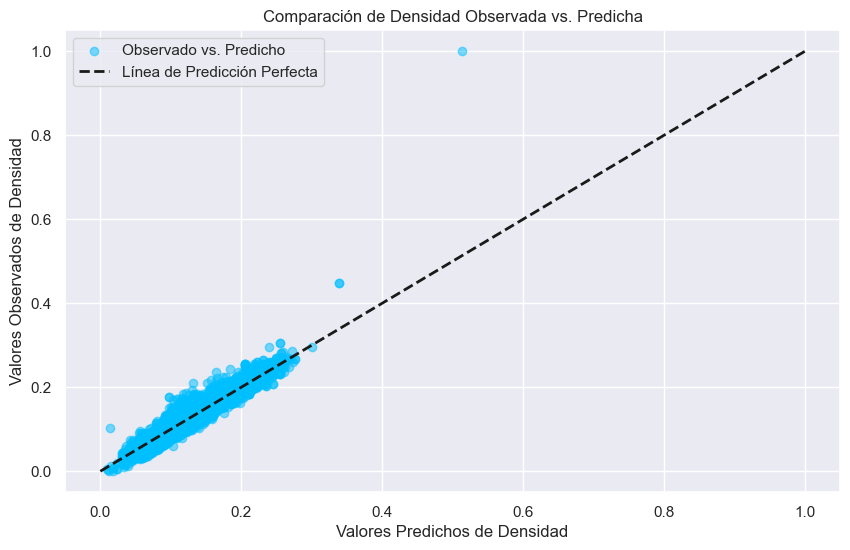

In [179]:
wine_normalized['y_pred'] = results.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(wine_normalized['y_pred'], wine_normalized['Densidad'], alpha=0.5, color='deepskyblue', label='Observado vs. Predicho')  # Cambiado a deepskyblue
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Línea de Predicción Perfecta')  # Cambiado a negro con estilo dashed
plt.title('Comparación de Densidad Observada vs. Predicha')
plt.xlabel('Valores Predichos de Densidad')
plt.ylabel('Valores Observados de Densidad')
plt.legend()
plt.show()